In [ ]:
from google.colab import files
files.upload()

Saving cereal.csv to cereal (1).csv


{'cereal (1).csv': b"name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating\r\n100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973\r\n100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679\r\nAll-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505\r\nAll-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912\r\nAlmond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843\r\nApple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541\r\nApple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094\r\nBasic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562\r\nBran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253\r\nBran Flakes,P,C,90,3,0,210,5,13,5,190,25,3,1,0.67,53.313813\r\nCap'n'Crunch,Q,C,120,1,2,220,0,12,12,35,25,2,1,0.75,18.042851\r\nCheerios,G,C,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999\r\nCinnamon Toast Crunch,G,C,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573\r\nClusters,G,C,110,3,2,

In [ ]:
!mkdir ~p ~/ .kaggle
!cp kaggle.json ~/ .kaggle/
!chmod 600 ~/ .kaggle/kaggle.json
!ls ~/ .kaggle

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/’: File exists
mkdir: cannot create directory ‘.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
cp: -r not specified; omitting directory '/root/'
chmod: cannot access '.kaggle/kaggle.json': No such file or directory
.kaggle:

/root/:


In [ ]:
!kaggle datasets download -d crawford/80-cereals

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!mkdir crawford/80-cereals
!unzip crawford/80-cereals.zip -d crawford/80-cereals
!ls crawford/80-cereals

mkdir: cannot create directory ‘crawford/80-cereals’: No such file or directory
unzip:  cannot find or open crawford/80-cereals.zip, crawford/80-cereals.zip.zip or crawford/80-cereals.zip.ZIP.
ls: cannot access 'crawford/80-cereals': No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Memanggil Dataset**

In [ ]:
df = pd.read_csv('cereal.csv')

In [ ]:
df.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


<Axes: >

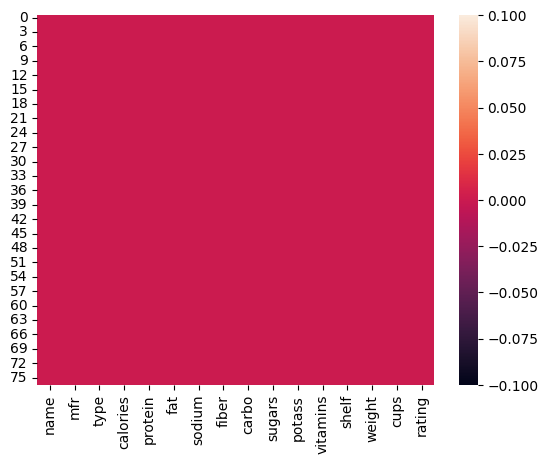

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


<ipython-input-39-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

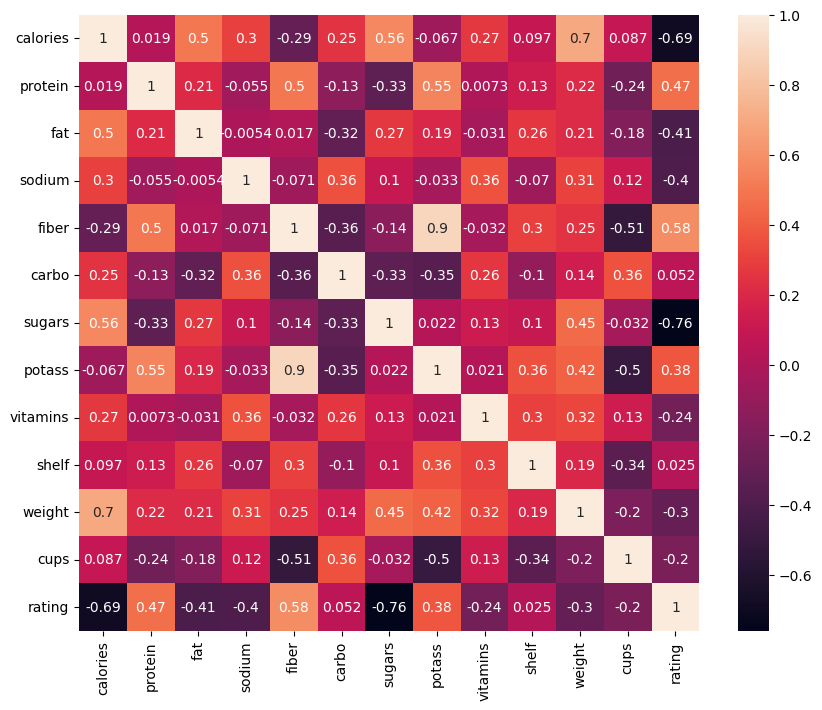

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
models = df.groupby('name').count()[['calories']].sort_values(by='calories',ascending=True).reset_index()
models = models.rename(columns={'calories':'numberOfCalories'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, '100% Bran'),
  Text(1, 0, 'Puffed Rice'),
  Text(2, 0, 'Product 19'),
  Text(3, 0, 'Post Nat. Raisin Bran'),
  Text(4, 0, 'Oatmeal Raisin Crisp'),
  Text(5, 0, 'Nutri-grain Wheat'),
  Text(6, 0, 'Nutri-Grain Almond-Raisin'),
  Text(7, 0, 'Nut&Honey Crunch'),
  Text(8, 0, 'Multi-Grain Cheerios'),
  Text(9, 0, 'Mueslix Crispy Blend'),
  Text(10, 0, 'Muesli Raisins; Peaches; & Pecans'),
  Text(11, 0, 'Muesli Raisins; Dates; & Almonds'),
  Text(12, 0, 'Maypo'),
  Text(13, 0, 'Lucky Charms'),
  Text(14, 0, 'Life'),
  Text(15, 0, 'Kix'),
  Text(16, 0, 'Puffed Wheat'),
  Text(17, 0, 'Quaker Oat Squares'),
  Text(18, 0, 'Quaker Oatmeal'

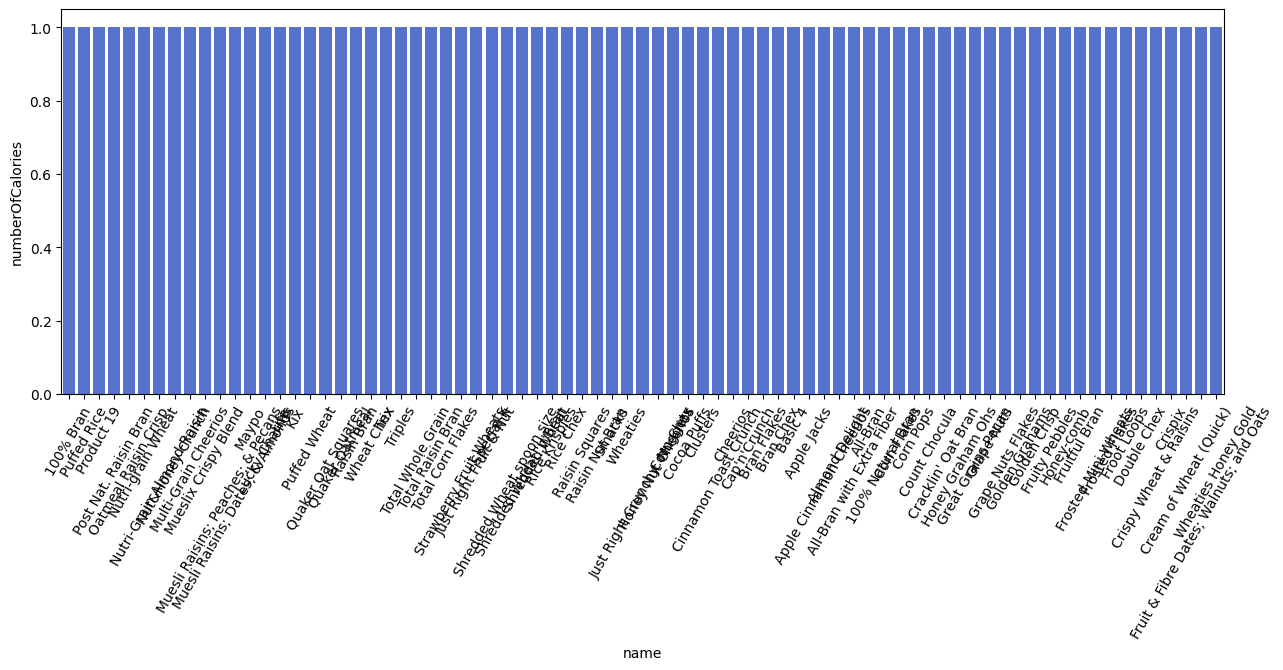

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['name'], y=models['numberOfCalories'], color='royalblue')
plt.xticks(rotation=60)

In [ ]:
engine = df.groupby('protein').count()[['calories']].sort_values(by='calories').reset_index()
engine = engine.rename(columns={'calories':'count'})

<Axes: xlabel='protein', ylabel='count'>

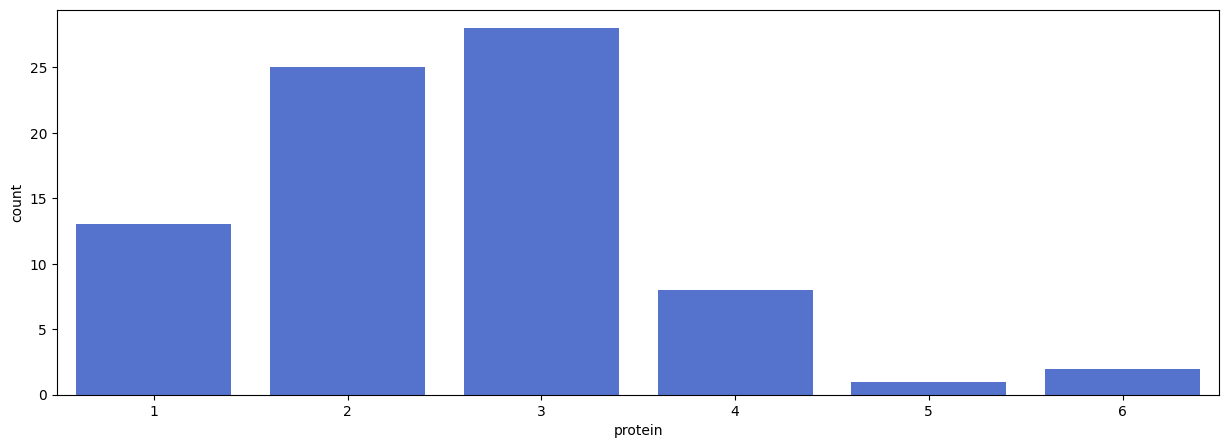

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['protein'], y=engine['count'], color='royalblue')

<ipython-input-44-b3e095594713>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fat'])


<Axes: xlabel='fat', ylabel='Density'>

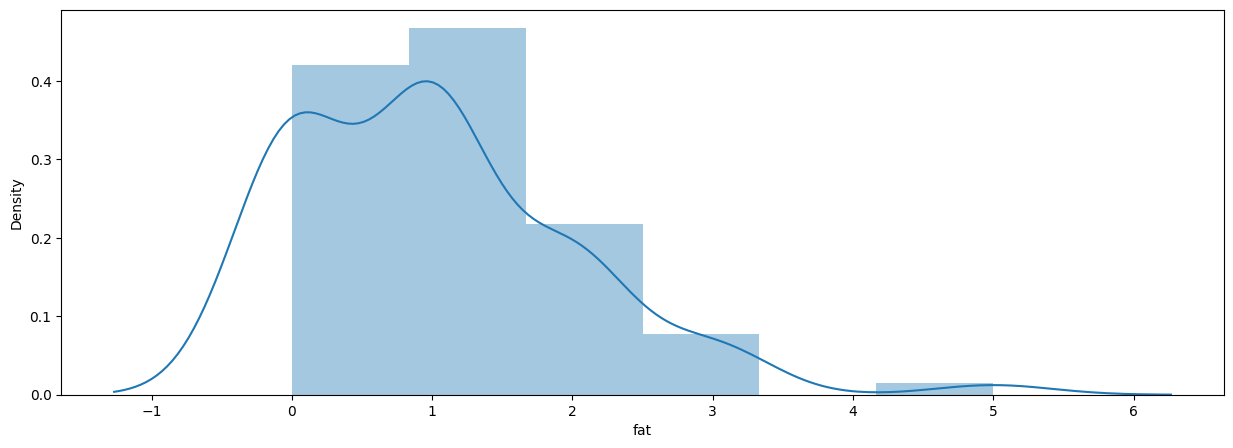

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['fat'])

<ipython-input-45-1e7ad00bae30>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sodium'])


<Axes: xlabel='sodium', ylabel='Density'>

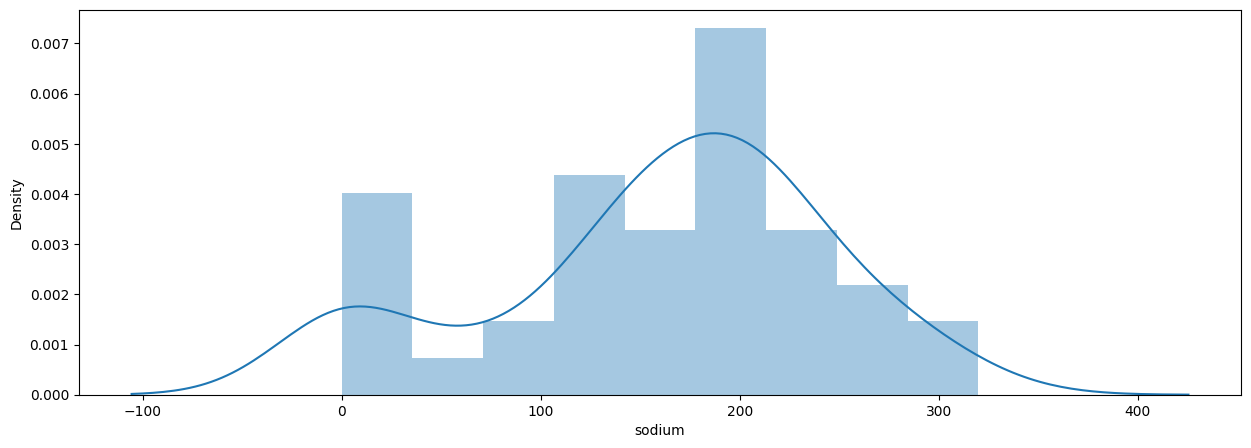

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['sodium'])

In [ ]:
features = ['calories','protein','fat','sodium','sugars','potass','vitamins']
x = df[features]
y = df['fiber']
x.shape, y.shape

((77, 7), (77,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(20,)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [ ]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier = ' , score)

akurasi model regresi linier =  0.8974629694719494


In [ ]:
#Year=2019, mileage=5000, tax=145, mpg=30.2, engineSize=2
input_data = np.array([[70, 4, 1, 130, 6, 280, 25]])

prediction = lr.predict(input_data)
print('Estimasi kandungan Serat  :', prediction)

Estimasi kandungan Serat  : [7.99370732]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

filename = 'estimasi_cereal.sav'
pickle.dump(lr,open(filename,'wb'))